# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

### Q1

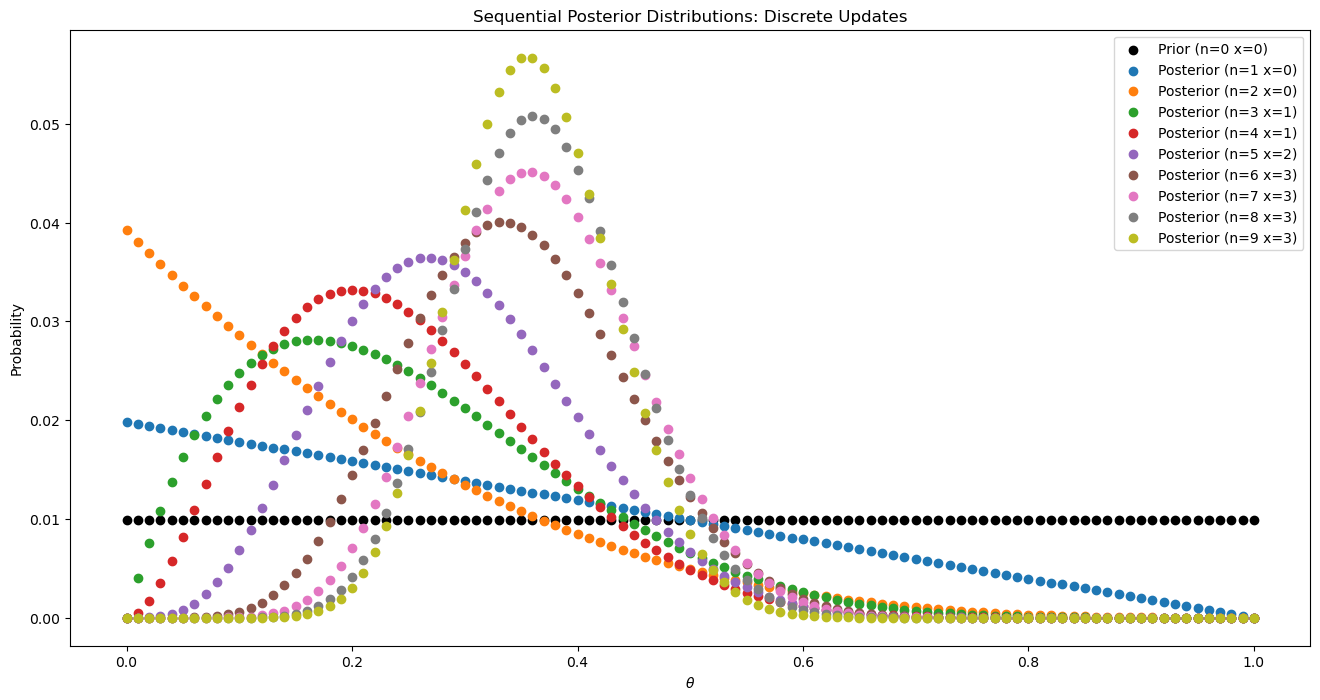

In [4]:

# Extracting and completing the Q1 code for sequential posterior updates
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Define parameters
parameter_domain = np.linspace(0, 1, 101)  # Discrete theta values
prior = np.ones(101) / 101  # Uniform prior over theta
observations = [0, 0, 1, 0, 1, 1, 0, 0, 0]  # Sequential observations
n, x = 0, 0  # Initialize trial count and success count

# Plot setup
plt.figure(figsize=(16, 8))
plt.scatter(parameter_domain, prior, label=f"Prior (n={n} x={x})", color='k')
plt.title("Sequential Posterior Distributions: Discrete Updates")
plt.xlabel(r"$\theta$")
plt.ylabel("Probability")

# Perform sequential posterior updates
for observation in observations:
    n += 1
    x += observation
    # Update the posterior using the binomial likelihood
    likelihood = stats.binom.pmf(x, n, parameter_domain)
    posterior = likelihood * prior  # Unnormalized posterior
    posterior /= posterior.sum()  # Normalize to sum to 1
    prior = posterior  # Update prior for next iteration
    plt.scatter(parameter_domain, posterior, label=f"Posterior (n={n} x={x})")

# Finalize plot
plt.legend()
plt.show()


### Q2

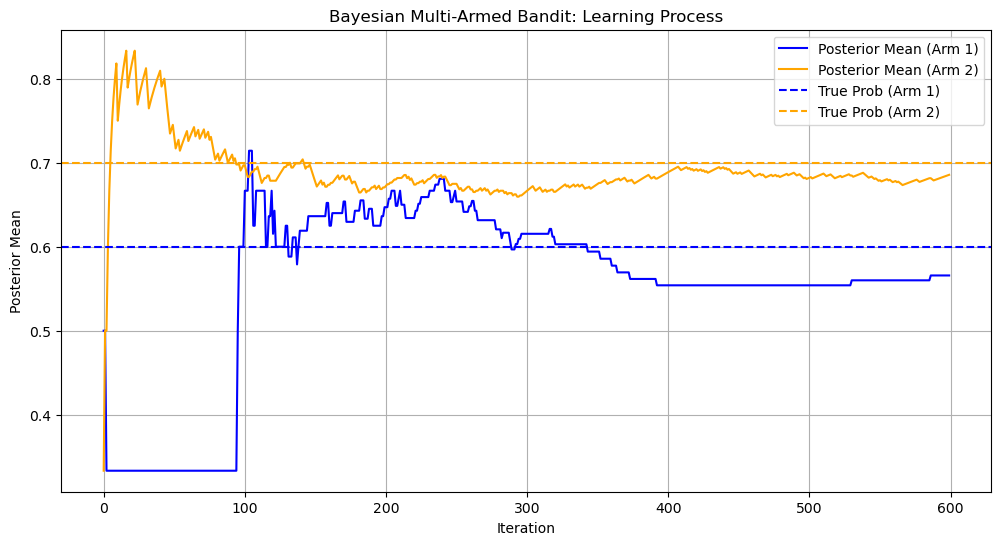

Final Posterior Mean (Arm 1): 0.566
Final Posterior Mean (Arm 2): 0.686
True Success Probability (Arm 1): 0.6
True Success Probability (Arm 2): 0.7


In [9]:
# Q2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the true success probabilities for each arm
true_success_probabilities = [0.6, 0.7]  # Arm 1 and Arm 2

# Set initial parameters for Beta priors (uniform distribution Beta(1,1))
prior_alpha = [1, 1]
prior_beta = [1, 1]

# Initialize counters for trials and successes
trial_counts = [0, 0]
success_counts = [0, 0]

# Define the number of iterations and sampling size
iterations = 600
monte_carlo_samples = 1000

# Track posterior means for visualization
posterior_means = [[], []]

# Bayesian Multi-Armed Bandit simulation
for i in range(iterations):
    # Sample success probabilities from the Beta posterior for both arms
    sampled_probabilities = [
        beta.rvs(prior_alpha[arm] + success_counts[arm], 
                 prior_beta[arm] + trial_counts[arm] - success_counts[arm], 
                 size=monte_carlo_samples)
        for arm in range(2)
    ]
    
    # Compute the probability that Arm 1's theta is smaller than Arm 2's
    prob_arm1_is_smaller = np.mean(sampled_probabilities[0] < sampled_probabilities[1])
    
    # Decide which arm to pull based on the computed probability
    chosen_arm = 1 if np.random.rand() < prob_arm1_is_smaller else 0
    reward = np.random.rand() < true_success_probabilities[chosen_arm]
    
    # Update the counts based on the observed reward
    trial_counts[chosen_arm] += 1
    success_counts[chosen_arm] += reward
    
    # Calculate and store the posterior mean for both arms
    for arm in range(2):
        mean = (prior_alpha[arm] + success_counts[arm]) / (
            prior_alpha[arm] + prior_beta[arm] + trial_counts[arm]
        )
        posterior_means[arm].append(mean)

# Plot the evolution of posterior means
plt.figure(figsize=(12, 6))
plt.plot(posterior_means[0], label="Posterior Mean (Arm 1)", color="blue")
plt.plot(posterior_means[1], label="Posterior Mean (Arm 2)", color="orange")
plt.axhline(true_success_probabilities[0], color="blue", linestyle="--", label="True Prob (Arm 1)")
plt.axhline(true_success_probabilities[1], color="orange", linestyle="--", label="True Prob (Arm 2)")
plt.xlabel("Iteration")
plt.ylabel("Posterior Mean")
plt.title("Bayesian Multi-Armed Bandit: Learning Process")
plt.legend()
plt.grid()
plt.show()

# Print final posterior means and true probabilities
print(f"Final Posterior Mean (Arm 1): {posterior_means[0][-1]:.3f}")
print(f"Final Posterior Mean (Arm 2): {posterior_means[1][-1]:.3f}")
print(f"True Success Probability (Arm 1): {true_success_probabilities[0]}")
print(f"True Success Probability (Arm 2): {true_success_probabilities[1]}")


### Q3

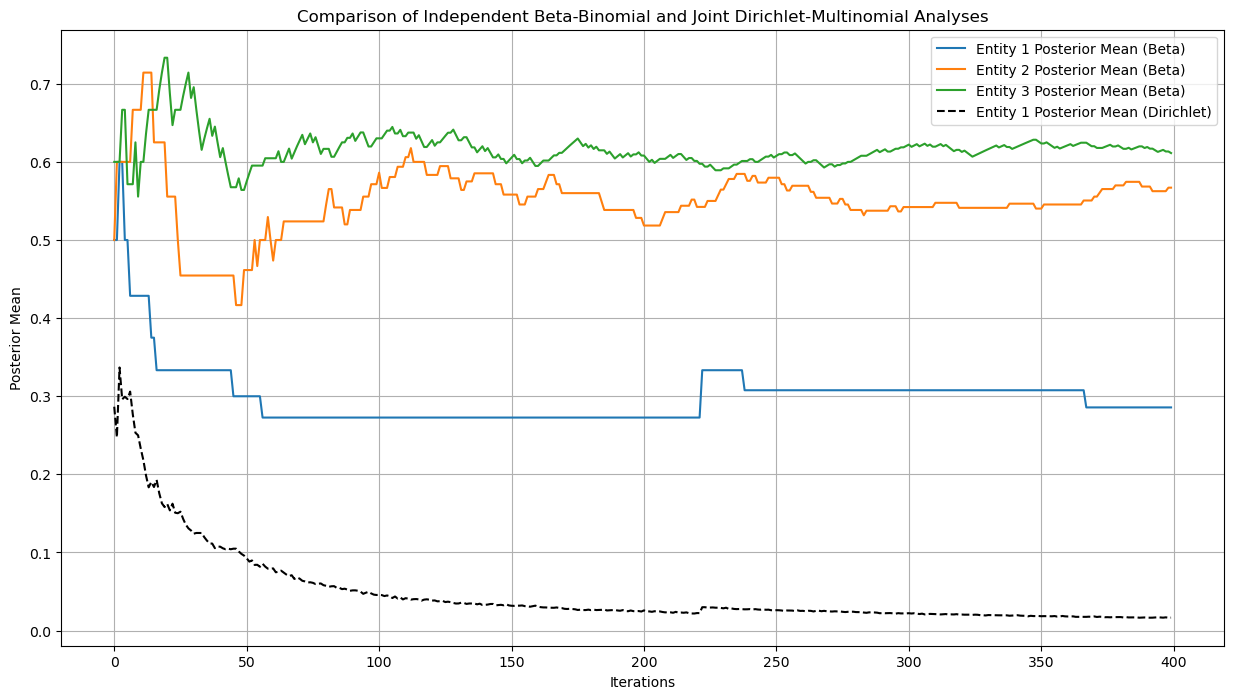

Final Posterior Mean Estimates (Independent Beta-Binomial Analysis):
Entity 1: 0.286
Entity 2: 0.567
Entity 3: 0.611

Final Posterior Mean for Entity 1 (Joint Dirichlet-Multinomial Analysis): 0.017


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

# True success probabilities for three entities
true_success_probabilities = [0.4, 0.55, 0.6]

# Initial prior parameters for Beta distributions (Independent Analysis)
beta_alpha_prior = [2, 2, 2]  # Alpha for each entity
beta_beta_prior = [2, 2, 2]   # Beta for each entity

# Counters for successes and trials for each entity
total_trials = [0, 0, 0]  # Total trials for each entity
successes = [0, 0, 0]     # Successes for each entity

# Number of iterations and samples
iterations = 400
mc_samples = 1500  # Monte Carlo samples for probability estimates
stability_factor = 1e-8  # Small constant to ensure Dirichlet stability

# Storage for posterior means
independent_means = [[] for _ in range(3)]
joint_means = []

# Bayesian Multi-Armed Bandit Algorithm
for step in range(iterations):
    # Independent Beta-Binomial Sampling
    # Draw samples from Beta posteriors for each entity
    beta_samples = [beta.rvs(beta_alpha_prior[i] + successes[i],
                             beta_beta_prior[i] + total_trials[i] - successes[i],
                             size=mc_samples) for i in range(3)]
    
    # Estimate the probability of each entity being the best
    prob_entity1_best = np.mean((beta_samples[0] > beta_samples[1]) & (beta_samples[0] > beta_samples[2]))
    prob_entity2_best = np.mean((beta_samples[1] > beta_samples[0]) & (beta_samples[1] > beta_samples[2]))
    
    # Decide which entity to pull based on probabilities
    if np.random.rand() < prob_entity1_best:
        chosen_entity = 0
    elif np.random.rand() < prob_entity2_best:
        chosen_entity = 1
    else:
        chosen_entity = 2

    # Simulate success or failure for the chosen entity
    reward = np.random.rand() < true_success_probabilities[chosen_entity]
    total_trials[chosen_entity] += 1
    successes[chosen_entity] += reward

    # Record posterior means for the Independent Analysis
    for i in range(3):
        posterior_mean = (beta_alpha_prior[i] + successes[i]) / (
            beta_alpha_prior[i] + beta_beta_prior[i] + total_trials[i]
        )
        independent_means[i].append(posterior_mean)

    # Joint Dirichlet-Multinomial Sampling
    dirichlet_params = [beta_alpha_prior[i] + successes[i] + stability_factor for i in range(3)]
    dirichlet_posterior_samples = dirichlet.rvs(dirichlet_params, size=mc_samples)
    
    # Compute the posterior mean for Entity 1 in the joint analysis
    joint_mean_entity1 = np.mean(dirichlet_posterior_samples[:, 0])
    joint_means.append(joint_mean_entity1)

# Plot Results
plt.figure(figsize=(15, 8))

# Independent Beta-Binomial Analysis
for i in range(3):
    plt.plot(independent_means[i], label=f"Entity {i+1} Posterior Mean (Beta)")

# Joint Dirichlet-Multinomial Analysis
plt.plot(joint_means, label="Entity 1 Posterior Mean (Dirichlet)", linestyle="--", color="black")

# Add labels and legends
plt.xlabel("Iterations")
plt.ylabel("Posterior Mean")
plt.title("Comparison of Independent Beta-Binomial and Joint Dirichlet-Multinomial Analyses")
plt.legend()
plt.grid()
plt.show()

# Print Results
print("Final Posterior Mean Estimates (Independent Beta-Binomial Analysis):")
for i in range(3):
    final_posterior_mean = (beta_alpha_prior[i] + successes[i]) / (
        beta_alpha_prior[i] + beta_beta_prior[i] + total_trials[i]
    )
    print(f"Entity {i+1}: {final_posterior_mean:.3f}")

print(f"\nFinal Posterior Mean for Entity 1 (Joint Dirichlet-Multinomial Analysis): {joint_means[-1]:.3f}")

### Answer Explanation

The Independent Beta-Binomial Analysis is suitable when each entity operates independently, as it offers simplicity
and evaluates entities separately. However, it cannot share information between entities, which may delay learning in sparse data settings.

The Joint Dirichlet-Multinomial Analysis leverages shared information across entities, making it ideal for related or interdependent entities. 
It achieves faster convergence in scenarios with limited data by pooling evidence, but it comes with increased computational complexity.

In an AB testing context, Independent Analysis is effective for evaluating distinct ad campaigns targeting different demographics. 
In contrast, Joint Analysis can be applied when testing variations of a single ad, sharing data across groups to improve decision-making.
